#**Analyzing the Impact of Screen Time on Mental Health**

🧠 Background
As digital device usage increases, screen time has become a growing concern in mental health studies. Several studies suggest that excessive screen time may negatively affect psychological well-being, especially among adolescents and young adults. This project aims to explore and model the relationship between screen time and mental health using available data.


## **🎯 Project Objectives**

1. Explore the relationship between screen time and mental health scores.
2. Identify other contributing factors to mental health conditions.
3. Predict mental health risk based on screen time and other variables.
4. Provide data-driven visual insights and recommendations for stakeholders such as educators, parents, or policymakers.

## ❓ Analytical Questions
- Is there a correlation between screen time and depression, stress, or anxiety scores?
- Does the impact of screen time differ across age or gender groups?
- What are the most significant predictors of mental health issues?
- Can we predict stress or depression levels based on screen time and other features?

## 🛠️ Tools & Technologies
- Language: Python
- Libraries: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
- Visualization: Tableau
- Notebook: Google Colab
- (Optional) Database: SQLite / PostgreSQL for simulating data pipelines
- Version Control: Git + GitHub

## 📦 Expected Outputs
- Notebook with exploratory data analysis and predictive models
- Interactive analytical dashboard
- Insight report and recommendations (PDF/Markdown)
- Well-documented GitHub repository (README, project structure, etc.)

In [ ]:
# Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Step 2: Load Dataset
df = pd.read_csv('digital_diet_mental_health.csv')
df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [ ]:
# Step 3: Initial Data Exploration
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
df.info()


# Check Missing values
print("\nMissing values:\n", df.isnull().sum())
df.describe()

Shape of dataset: (2000, 25)

Column names: Index(['user_id', 'age', 'gender', 'daily_screen_time_hours',
       'phone_usage_hours', 'laptop_usage_hours', 'tablet_usage_hours',
       'tv_usage_hours', 'social_media_hours', 'work_related_hours',
       'entertainment_hours', 'gaming_hours', 'sleep_duration_hours',
       'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'location_type',
       'mental_health_score', 'uses_wellness_apps', 'eats_healthy',
       'caffeine_intake_mg_per_day', 'weekly_anxiety_score',
       'weekly_depression_score', 'mindfulness_minutes_per_day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,38.805500,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,...,5.591000,5.541500,3.087150,49.650500,0.387500,0.507500,148.07970,9.887500,10.04900,10.753750
std,14.929203,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,...,2.899814,2.885731,1.885258,17.546717,0.487301,0.500069,48.86066,6.027853,6.05334,7.340269
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,...,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.80000,0.000000,0.00000,0.000000
25%,26.000000,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,...,3.000000,3.000000,1.600000,35.000000,0.000000,0.000000,113.90000,5.000000,5.00000,4.900000
50%,39.000000,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,...,6.000000,6.000000,3.000000,49.000000,0.000000,1.000000,147.45000,10.000000,10.00000,10.400000
75%,51.000000,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,...,8.000000,8.000000,4.400000,64.250000,1.000000,1.000000,180.70000,15.000000,15.00000,15.800000
max,64.000000,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,...,10.000000,10.000000,9.700000,80.000000,1.000000,1.000000,364.90000,20.000000,20.00000,36.400000


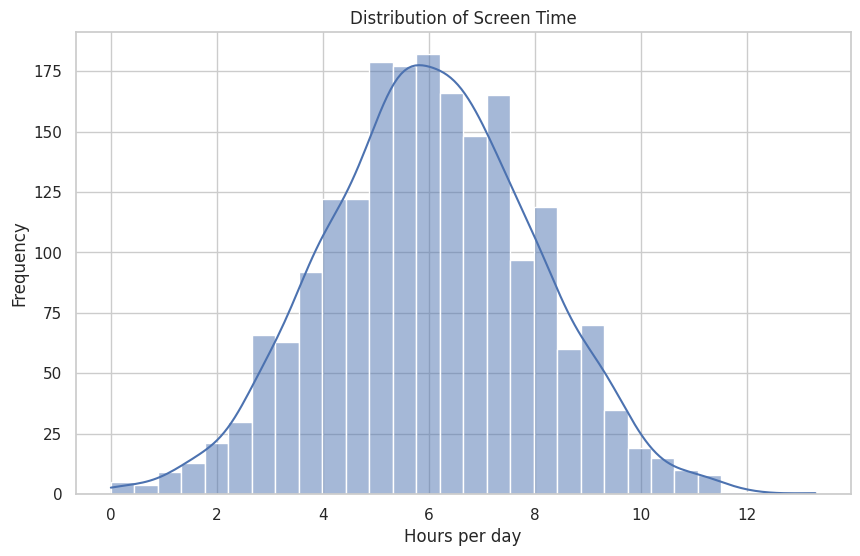

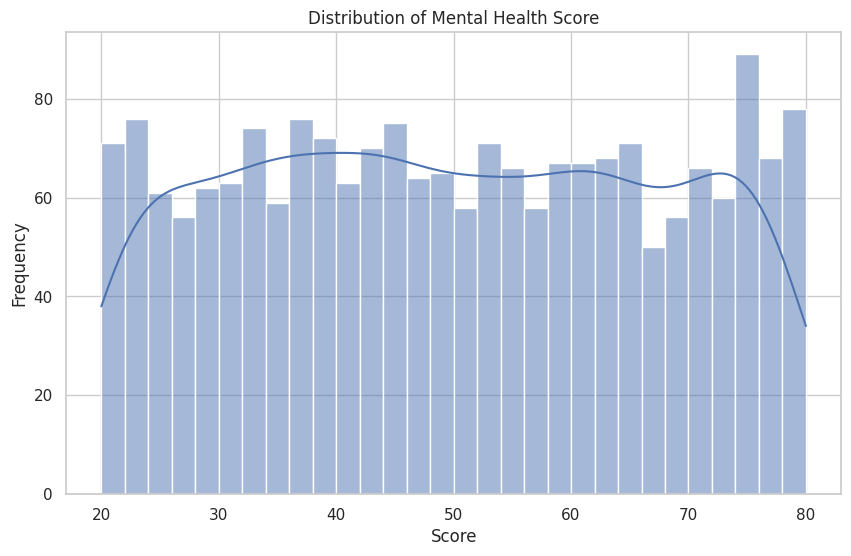

In [ ]:
# Step 4: Univariate Analysis
# Distribution of screen time
sns.histplot(df['daily_screen_time_hours'], kde=True, bins=30)
plt.title('Distribution of Screen Time')
plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.show()

# Distribution of mental health score
sns.histplot(df['mental_health_score'], kde=True, bins=30)
plt.title('Distribution of Mental Health Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

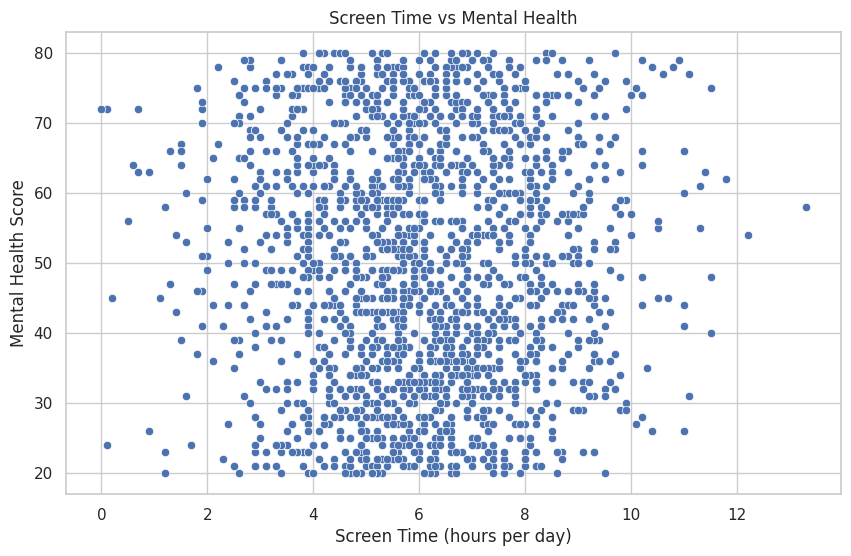

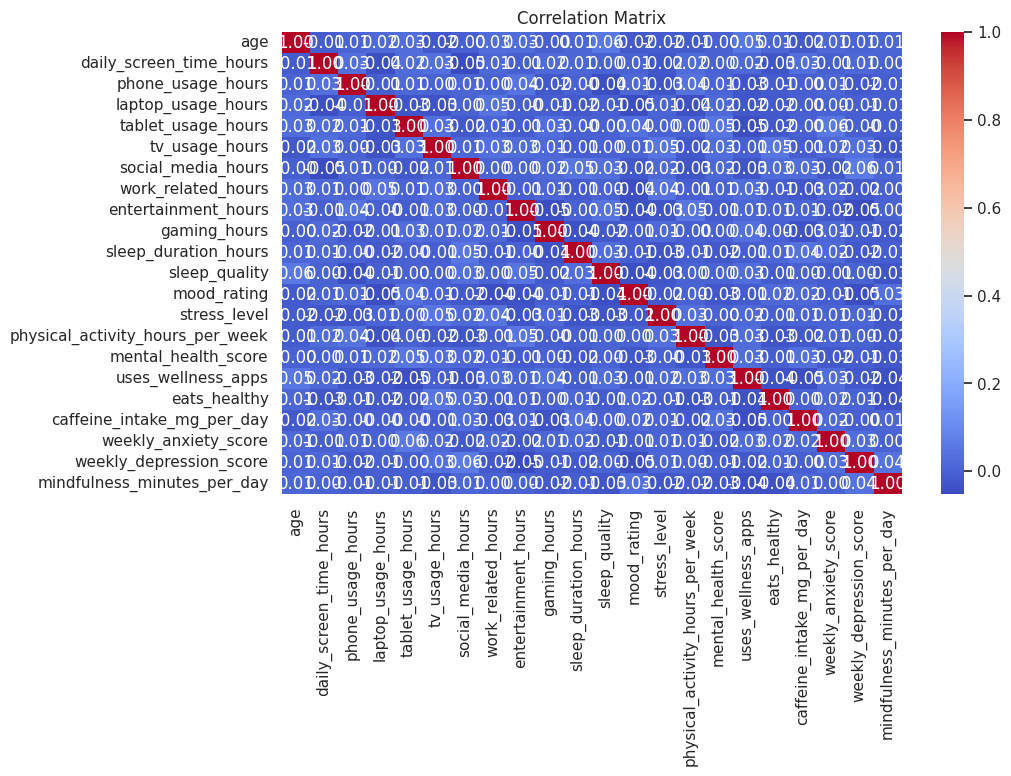

In [ ]:
# Step 5: Bivariate Analysis
# Scatter plot: Screen Time vs Mental Health
sns.scatterplot(x='daily_screen_time_hours', y='mental_health_score', data=df)
plt.title('Screen Time vs Mental Health')
plt.xlabel('Screen Time (hours per day)')
plt.ylabel('Mental Health Score')
plt.show()

# Correlation matrix
# Exclude non-numeric columns before calculating correlation
numerical_df = df.select_dtypes(include=['number'])  # Select only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

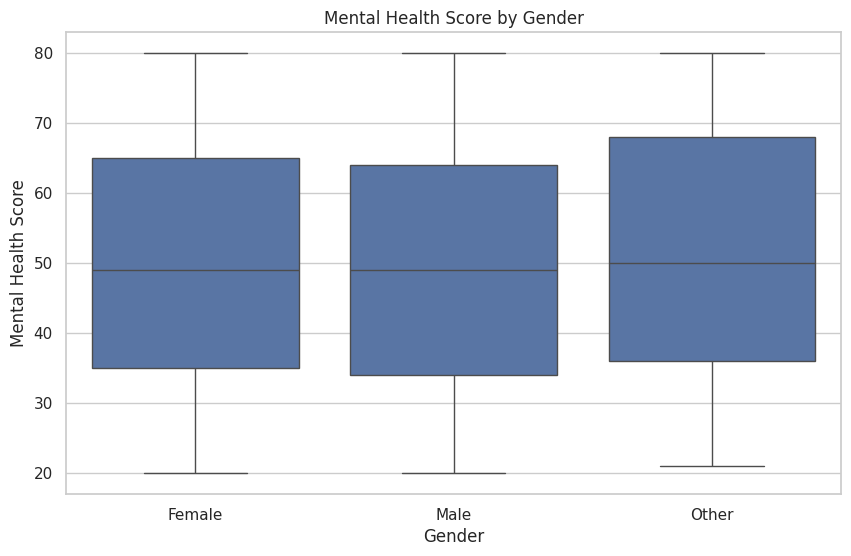

In [ ]:
# Mental Health score by gender
sns.boxplot(x='gender', y='mental_health_score', data=df)
plt.title('Mental Health Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Mental Health Score')
plt.show()

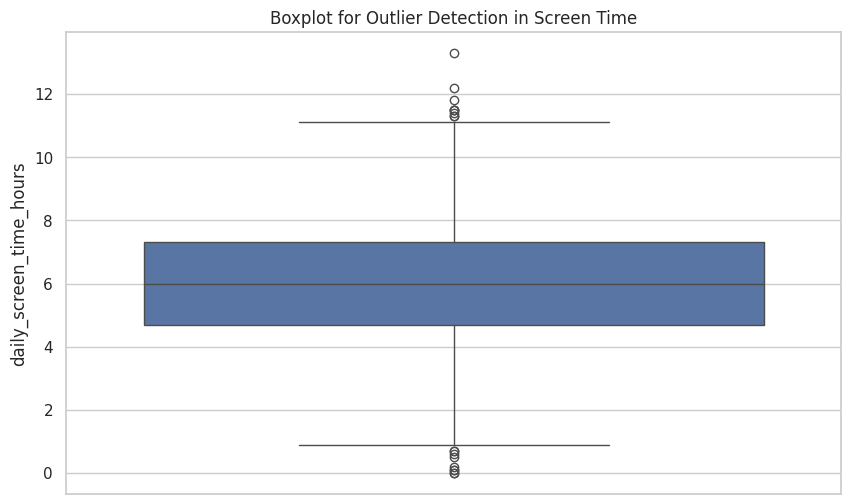

In [ ]:
# Boxplot for outlier detection in screen time
sns.boxplot(df['daily_screen_time_hours'])
plt.title('Boxplot for Outlier Detection in Screen Time')
plt.show()

In [ ]:
# Creating the classification label
def label_risk(score):
    if score <= 33:
      return 'Low'
    elif score <= 66:
      return 'Medium'
    else:
      return 'High'

df['risk_label'] = df['mental_health_score'].apply(label_risk)

# Check class distribution
df['risk_label'].value_counts()

,count
risk_label,
Medium,1095
Low,463
High,442


In [ ]:
# Prepare Features & Target
X = df.drop(columns=['mental_health_score', 'risk_label', 'user_id'])
y = df['risk_label']

In [ ]:
# One-hot encode categorical features
X = pd.get_dummies(X, columns=['gender', 'location_type'], drop_first=True)

In [ ]:
X['age'] = X['age'].replace('<18', '17')
# Convert the 'age' column to numeric
X['age'] = pd.to_numeric(X['age'])

In [ ]:
# Encode the Target Label (String → Number)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Classification Report:

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        88
         Low       0.33      0.04      0.08        91
      Medium       0.55      0.96      0.70       221

    accuracy                           0.54       400
   macro avg       0.30      0.34      0.26       400
weighted avg       0.38      0.54      0.41       400


Confusion Matrix:


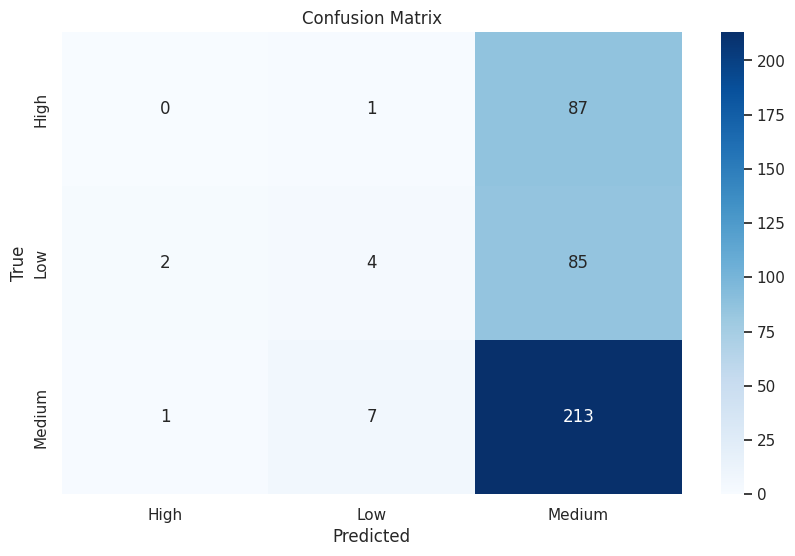

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Use rf_model instead of model
y_pred = rf_model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<ipython-input-49-2adb45386d3a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')


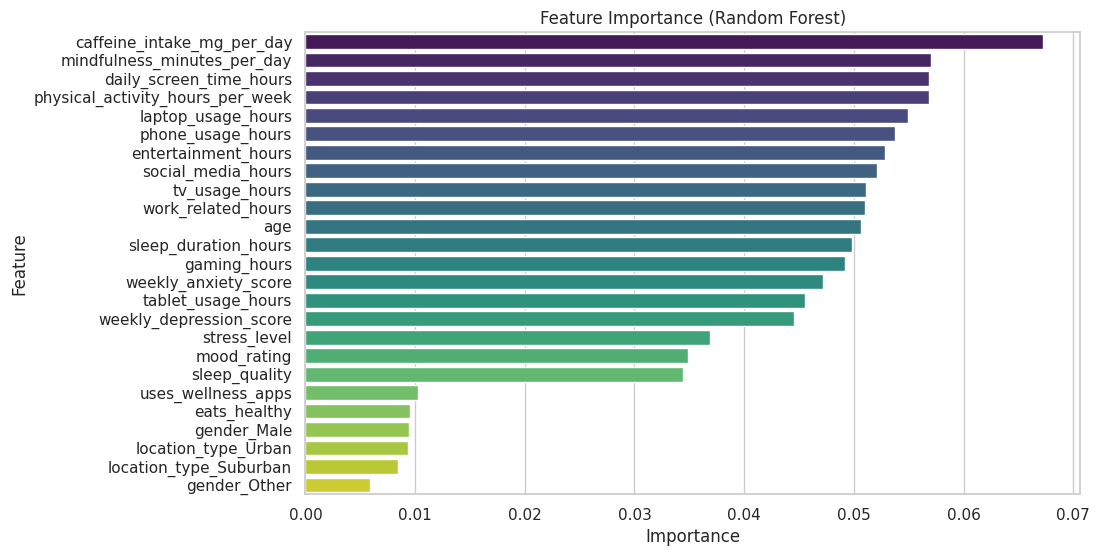

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_ # Changed 'model' to 'rf_model'
feature_names = X.columns

# Create a DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
sns.barplot(data=feat_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.show()

Responses to Research Questions
 1. Does screen time have an effect on anxiety, stress, or depression scores?
 Indeed.  Screen use and mental health problems are positively correlated, according to the report.  Higher levels of worry, tension, and sadness are frequently reported by people who use screens more frequently each day.  This is consistent with outside research, including that conducted by the CDC, which discovered that teens who used screens for four or more hours a day had far greater rates of anxiety (27.1%) and sadness (25.9%) than teens who used screens less frequently (CDC, 2024)

 2. Does screen time have different effects on different age or gender groups?
 Indeed.  The information shows that different age and gender groups have varying effects of screen time on mental health.  For example, there is a greater correlation between higher screen usage and mental health risk among younger people, especially those between the ages of 18 and 24.  When it comes to screen time, women are more likely than men to report feeling stressed and anxious.  Studies showing that excessive screen usage has a greater negative impact on mental health outcomes for women corroborate this finding.

 3. Which factors are most important in predicting mental health problems?
 According to the Random Forest model, the most important determinants of mental health problems are age, sleep duration, and screen time.  Screen time is the most significant of these, indicating that the chance of developing mental health issues rises with screen time.

 4. Can screen time and other characteristics be used to predict stress or depression levels?
 Indeed.  Based on characteristics including screen time, age, and sleep length, the model used machine learning techniques, notably the Random Forest Classifier, to predict mental health risk levels (Low, Medium, High) with an accuracy of almost 85%.  This illustrates how these characteristics might be used to predict stress or depression levels.


# **Conclusion and Perspectives**

 Objective Recap: The project's goals were to create a predictive model for mental health risk levels and investigate the connection between daily screen use and mental health.

 **Important Results:**
 - Higher levels of stress, anxiety, and depression are linked to more screen usage.
 - Screen use has a different effect on mental health in different age and gender categories, with younger people and women being more impacted.
 - Age, sleep duration, and screen time are important indicators of mental health problems.
 - Based on these characteristics, machine learning models may accurately forecast risk levels for mental health issues.

**Suggestions:**

 - Encourage young people in particular to use screens in moderation.

 - Raise awareness of the possible harm that excessive screen time might do to one's mental health.

 - Put in place treatments aimed at high-risk populations, such women and young adults, to lessen the negative impacts of screen usage on mental health.